In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns

# train-test split and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

In [2]:
""" acquire training and testing data """
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [3]:
# describe training data
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Davies, Mr. Charles Henry",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# describe testing data
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Nasr, Mr. Mustafa",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [5]:
# head training data
train_df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# tail testing data
test_df.tail(n=5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
""" wrangle, prepare, cleanse the data """
for df in (train_df, test_df):
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False).map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 4, 'Mlle': 1, 'Col': 4, 'Major': 4, 'Countess': 4, 'Don': 4, 'Lady': 4, 'Jonkheer': 4, 'Mme': 2, 'Sir': 4, 'Ms': 1, 'Capt': 4, 'Dona': 4}).astype(int)
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df['Ticket'] = df['Ticket'].str.extract(r'([A-Za-z]+)', expand=False).apply(lambda x: 0 if pd.isnull(x) else 1)
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
    df['Embarked'] = df['Embarked'].fillna('S').map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [8]:
# value counts training data
train_df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [9]:
# value counts testing data
test_df['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

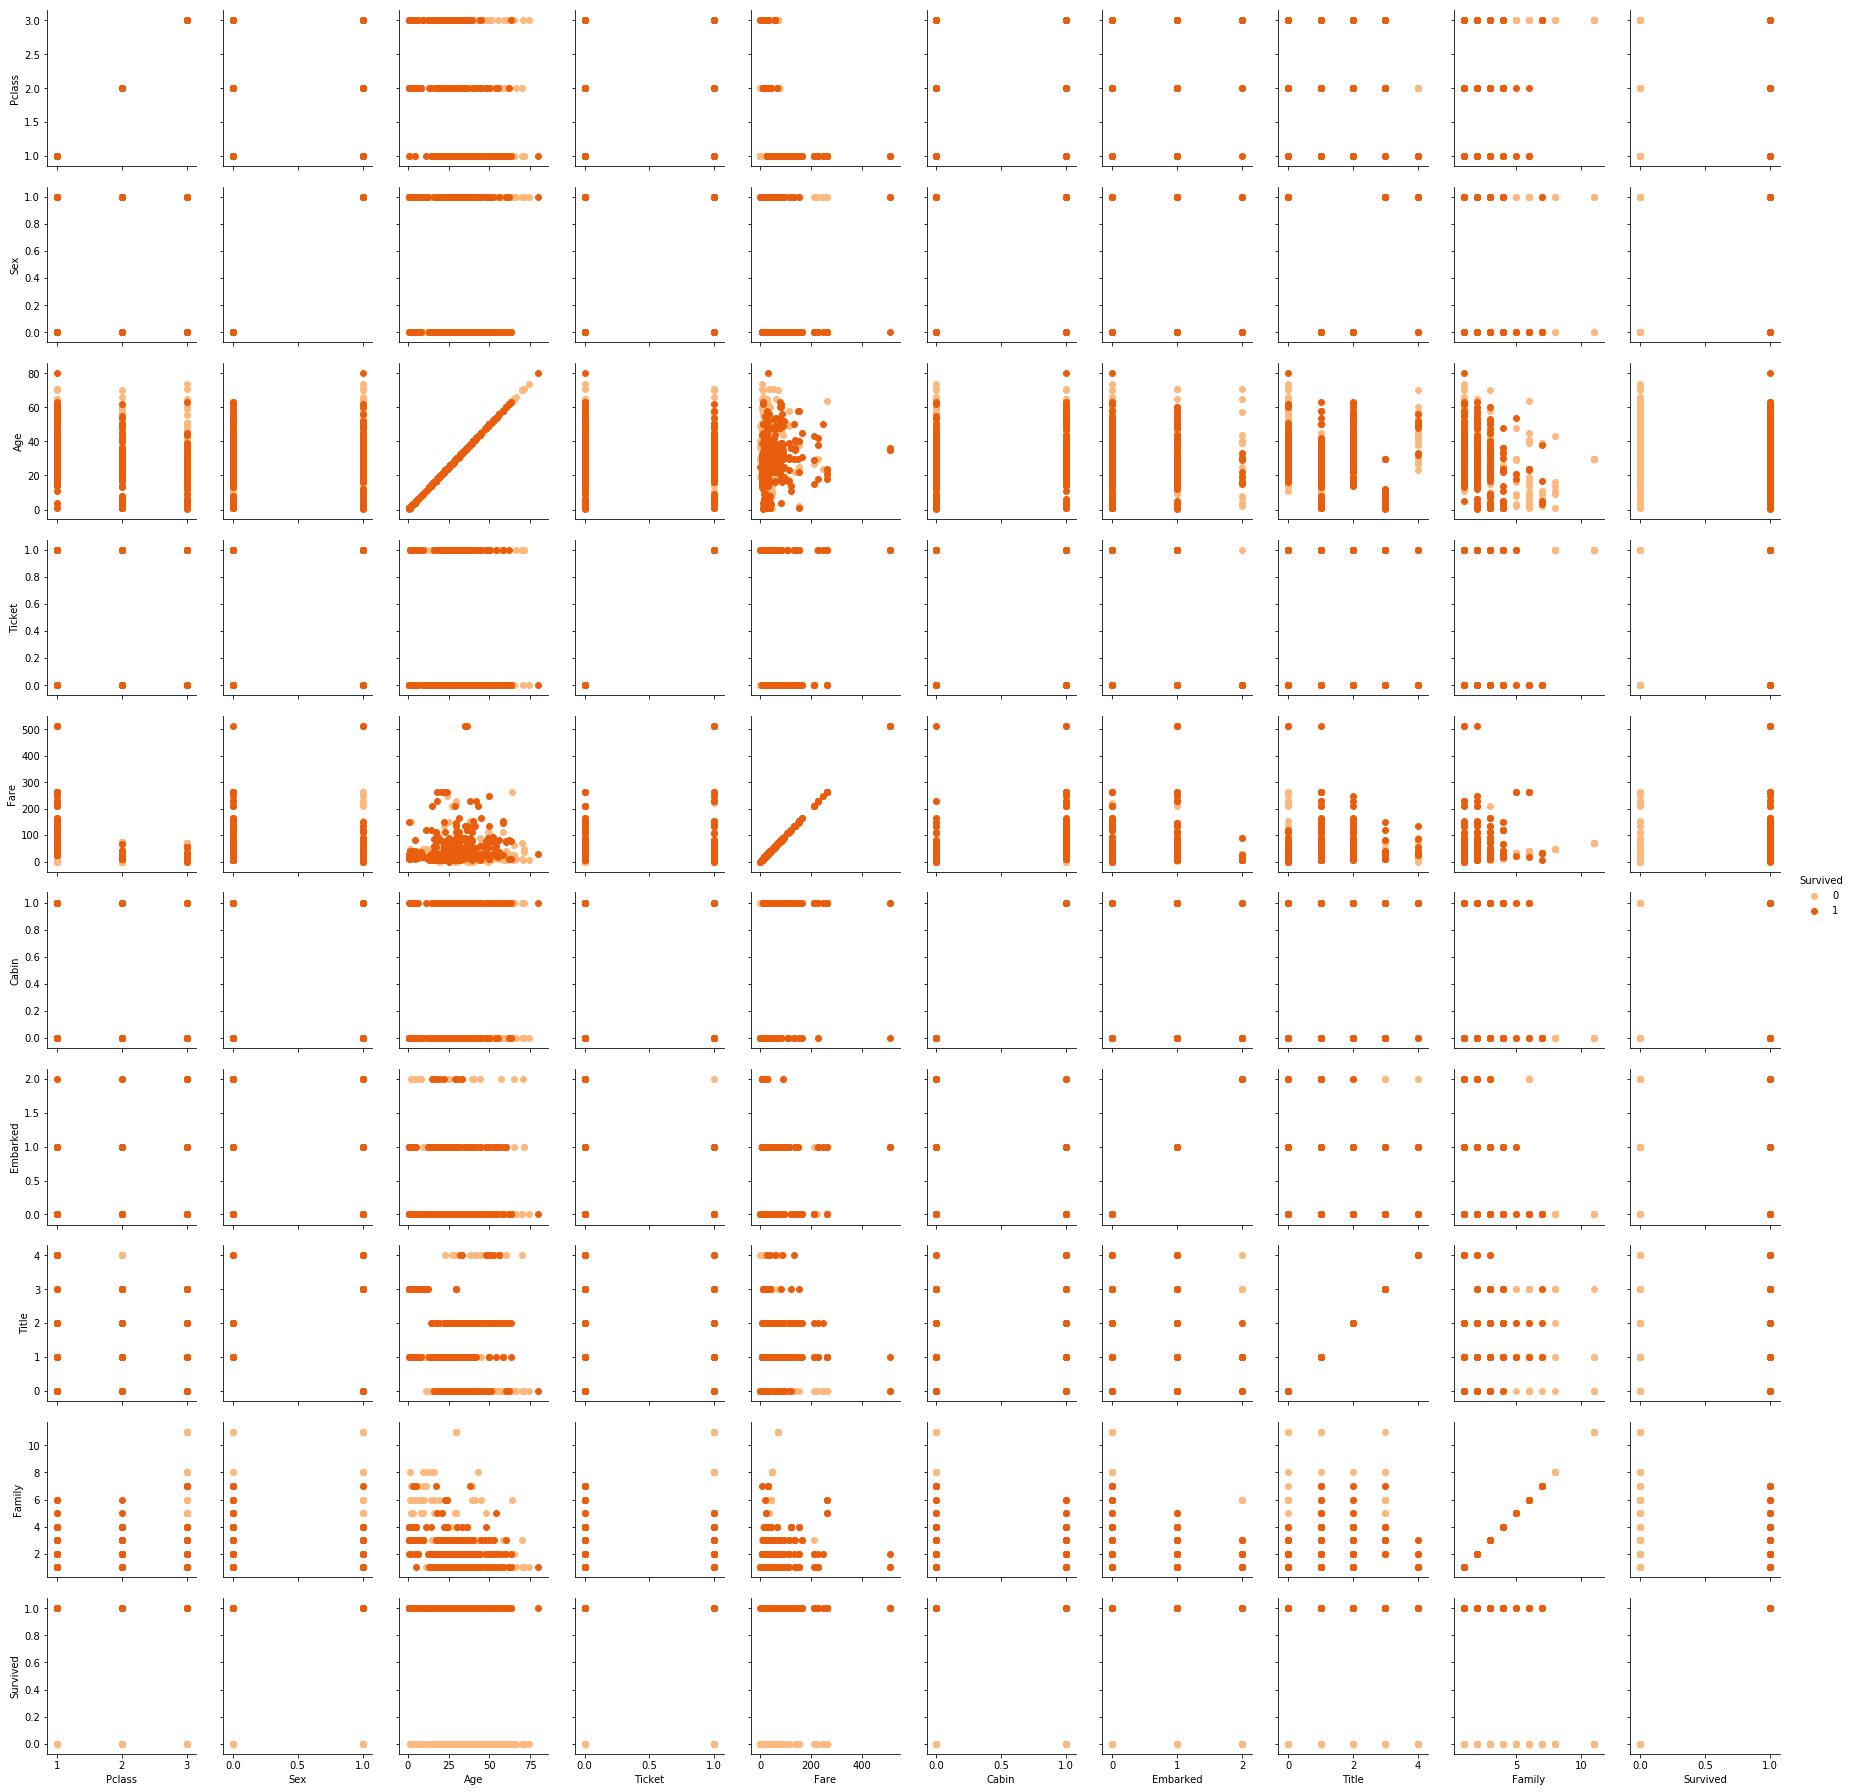

In [10]:
""" analyze, identify patterns, and explore the data """
x = train_df.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch'], axis=1)
y = train_df['Survived']

# pairgrid for training data
grd = sns.PairGrid(pd.concat([x, y], axis=1), hue='Survived', palette="Oranges")
grd = grd.map(plt.scatter)
grd = grd.add_legend()

In [11]:
""" model, predict and solve the problem """

# train-test split
x_train, x_validate, y_train, y_validate = train_test_split(x, y, random_state=0, test_size=0.25)

In [12]:
# model
logreg = LogisticRegression().fit(x_train, y_train)
logreg_ypredict = logreg.predict(x_validate)
logreg_f1score, logreg_auc = f1_score(y_validate, logreg_ypredict), roc_auc_score(y_validate, logreg_ypredict)
print('logistic regression\t f1 score: %f, auc: %f' %(logreg_f1score, logreg_auc))

treeclf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, splitter='best').fit(x_train, y_train)
treeclf_ypredict = treeclf.predict(x_validate)
treeclf_f1score, treeclf_auc = f1_score(y_validate, treeclf_ypredict), roc_auc_score(y_validate, treeclf_ypredict)
print('decision tree classifier\t f1 score: %f, auc: %f' %(treeclf_f1score, treeclf_auc))

forestclf = RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=250, random_state=0).fit(x_train, y_train)
forestclf_ypredict = forestclf.predict(x_validate)
forestclf_f1score, forestclf_auc = f1_score(y_validate, forestclf_ypredict), roc_auc_score(y_validate, forestclf_ypredict)
print('random forest classifier\t f1 score: %f, auc: %f' %(forestclf_f1score, forestclf_auc))

nnclf = MLPClassifier(activation='logistic', hidden_layer_sizes=[20, 10], max_iter=9999, random_state=0).fit(x_train, y_train)
nnclf_ypredict = nnclf.predict(x_validate)
nnclf_f1score, nnclf_auc = f1_score(y_validate, nnclf_ypredict), roc_auc_score(y_validate, nnclf_ypredict)
print('neural network classifier\t f1 score: %f, auc: %f' %(nnclf_f1score, nnclf_auc))

logistic regression	 f1 score: 0.731429, auc: 0.783830
decision tree classifier	 f1 score: 0.775000, auc: 0.818688
random forest classifier	 f1 score: 0.807453, auc: 0.843739
neural network classifier	 f1 score: 0.768293, auc: 0.813849


In [13]:
""" visualize, report, and present the problem solving steps and final solution """
model = forestclf

In [14]:
""" supply or submit the results """
x_test = test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch'], axis=1)
y_test = model.predict(x_test)

out = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_test})
out.to_csv('submission.csv', index=False)